In [5]:
%pylab inline
%config InlineBackend.figure_format = 'retina'
import emcee
import exocartographer.gp_map as gm
import healpy
import plotutils.plotutils as pu
import seaborn

Populating the interactive namespace from numpy and matplotlib


In [3]:
seaborn.set_style('ticks')

## Try Sampling From the Ylm GP

Actually, before sampling, let's just plot a map.  Here we have a map that has a 20% variance ($\sigma = 0.2$ in $\log$-space), only 1% white noise, with ``nside = 16``.  The angular scale is 
$$
\lambda = \frac{\pi}{4} = 45^\circ
$$

In [57]:
logmap = gm.draw_map_cl(16, 0.0, 0.2, 0.01, np.pi/4)

Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin


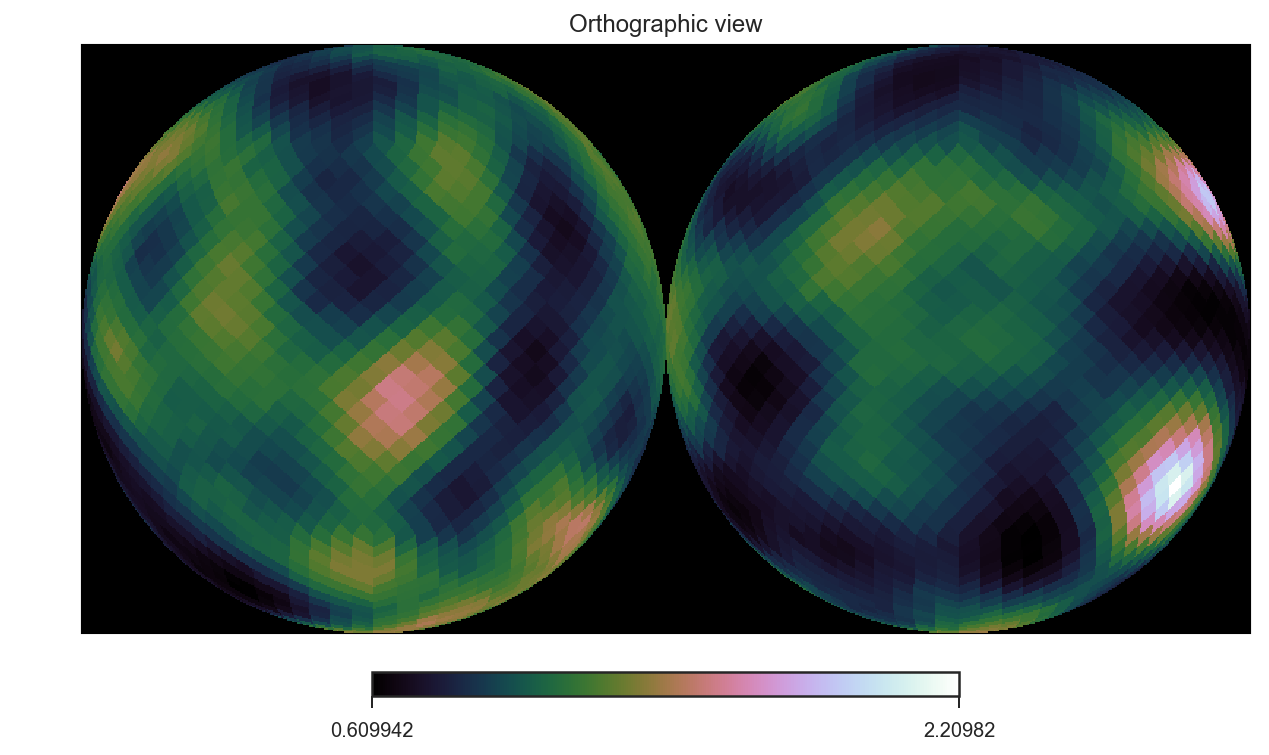

In [58]:
healpy.orthview(exp(logmap), cmap='cubehelix')

Let's try to sample from this map prior; if we successfully do so, each draw will correspond to a map like the above.  

In [70]:
def logpost(logmap):
    return gm.map_logprior_cl(logmap, 0.0, 0.2, 0.01, np.pi/4.0)

In [85]:
for i in range(10):
    print logpost(gm.draw_map_cl(8, 0.0, 0.2, 0.01, np.pi/4))

Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin
(4698.36178084+0j)
Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin
(4699.83145556+0j)
Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin
(4711.11084496+0j)
Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin
(4696.28276964+0j)
Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin
(4720.80456546+0j)
Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin
(4723.59483984+0j)
Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin
(4698.0850524+0j)
Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin
(4712.2581881+0j)
Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin
(4724.95634698+0j)
Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin
(4706.68161648+0j)


In [71]:
sampler = emcee.EnsembleSampler(2048, healpy.nside2npix(8), logpost)

In [88]:
result = [array([gm.draw_map_cl(8, 0.0, 0.2, 0.01, np.pi/4) for i in range(2048)])]

Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin
Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin
Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin
Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin
Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin
Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin
Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin
Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin
Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin
Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin
Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin
Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin
Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin
Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin
Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm

In [ ]:
result = sampler.run_mcmc(result[0], 100, thin=10)

In [ ]:
plot(sampler.lnprobability.T)
print mean(sampler.acceptance_fraction)

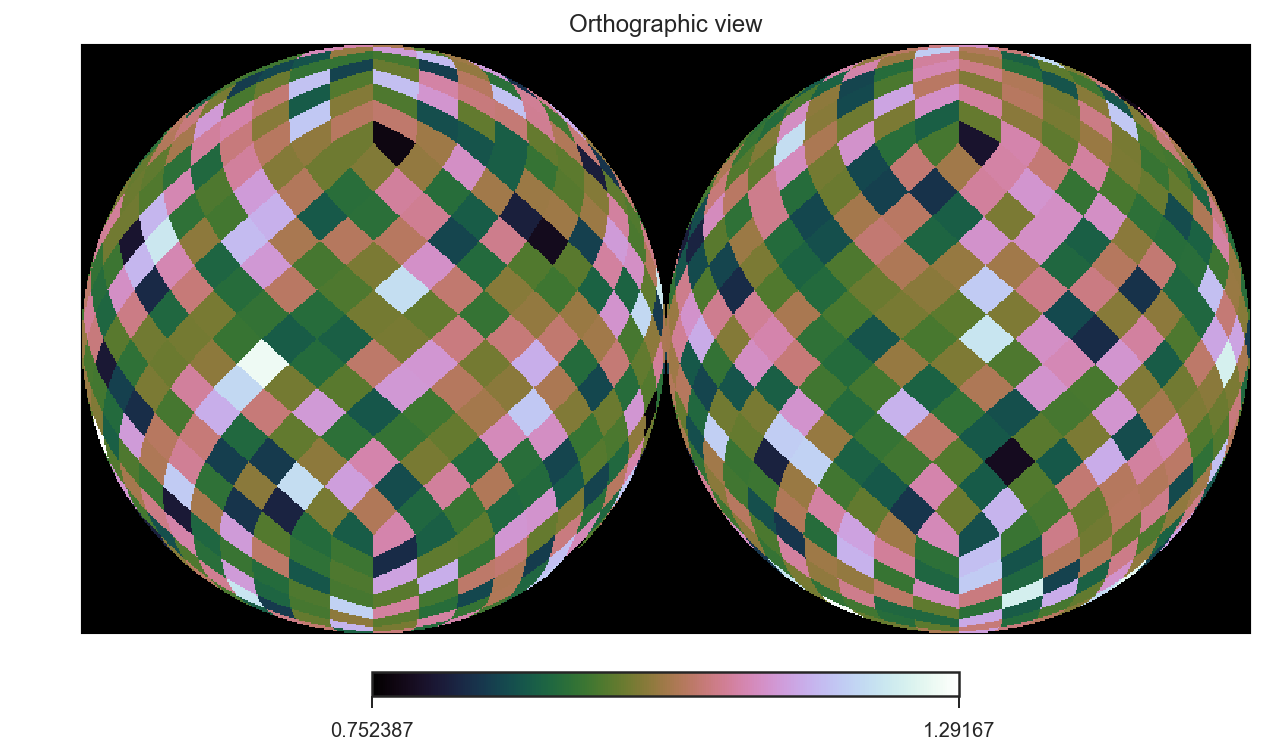

In [84]:
healpy.orthview(exp(result[0][0,:]), cmap='cubehelix')

In [82]:
healpy.anafast(result[0][0,:])

array([  1.21968025e-04,   5.25671329e-05,   1.03506541e-04,
         8.52888561e-05,   1.60652767e-04,   4.81886687e-05,
         1.98580405e-04,   1.98160001e-04,   9.92715441e-05,
         1.06662698e-04,   1.53258295e-04,   1.98650152e-04,
         2.02893460e-04,   1.35123407e-04,   1.49088690e-04,
         1.08646445e-04,   1.46371282e-04,   1.68249185e-04,
         8.39124216e-05,   1.45119332e-04,   9.28527660e-05,
         1.34326092e-04,   1.00143816e-04,   1.77836502e-04])